# **Team INSIGHT CREW**

1. Devang Choudhary - 202418016
2. Priyanshi Saini  - 202418002
3. Nupoor Londhe    - 202418040
4. Yash Deshmukh    - 202418063


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [2]:
data = pd.read_csv('/content/online_gaming_behavior_dataset.csv')
data.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag

In [4]:
data.dropna()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40029,49029,32,Male,USA,Strategy,20.619662,0,Easy,4,75,85,14,Medium
40030,49030,44,Female,Other,Simulation,13.539280,0,Hard,19,114,71,27,High
40031,49031,15,Female,USA,RPG,0.240057,1,Easy,10,176,29,1,High
40032,49032,34,Male,USA,Sports,14.017818,1,Medium,3,128,70,10,Medium


In [5]:
data.duplicated().sum().any()


False

## EDA

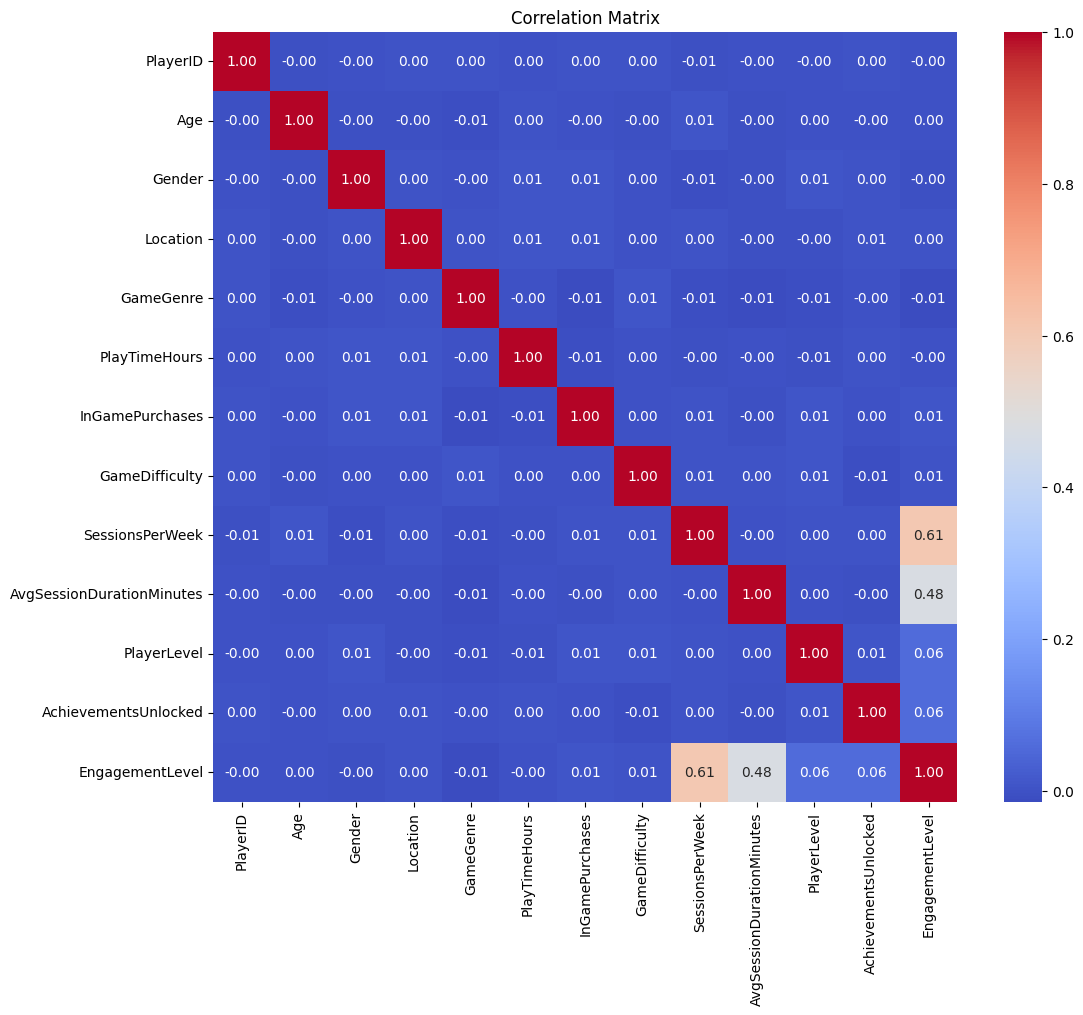

In [27]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

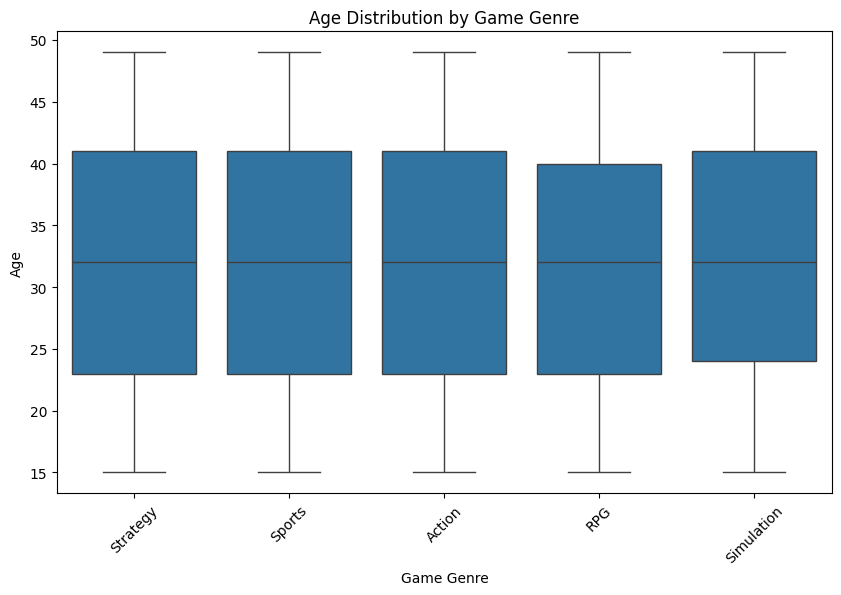

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='GameGenre', y='Age', data=data)
plt.title('Age Distribution by Game Genre')
plt.xlabel('Game Genre')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()

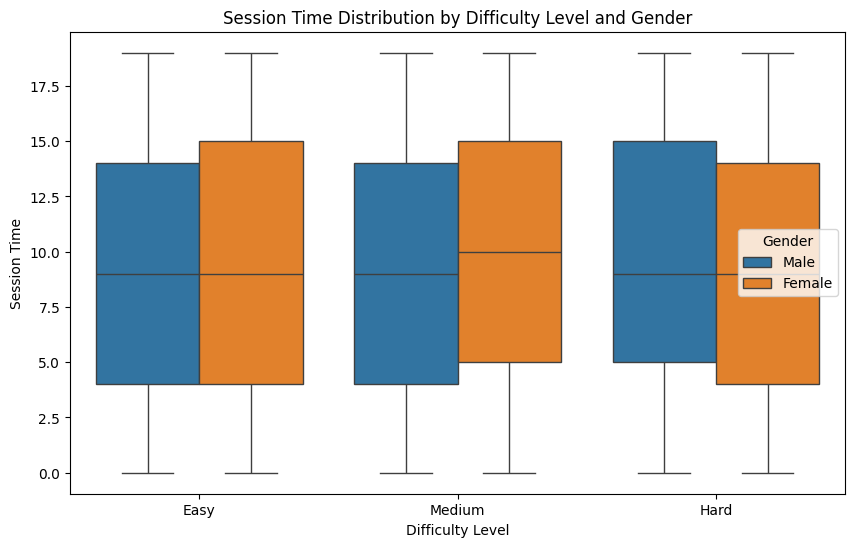

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='GameDifficulty', y='SessionsPerWeek', hue='Gender', data=data, order=['Easy','Medium','Hard'])
plt.title('Session Time Distribution by Difficulty Level and Gender')
plt.xlabel('Difficulty Level')
plt.ylabel('Session Time')
plt.show()

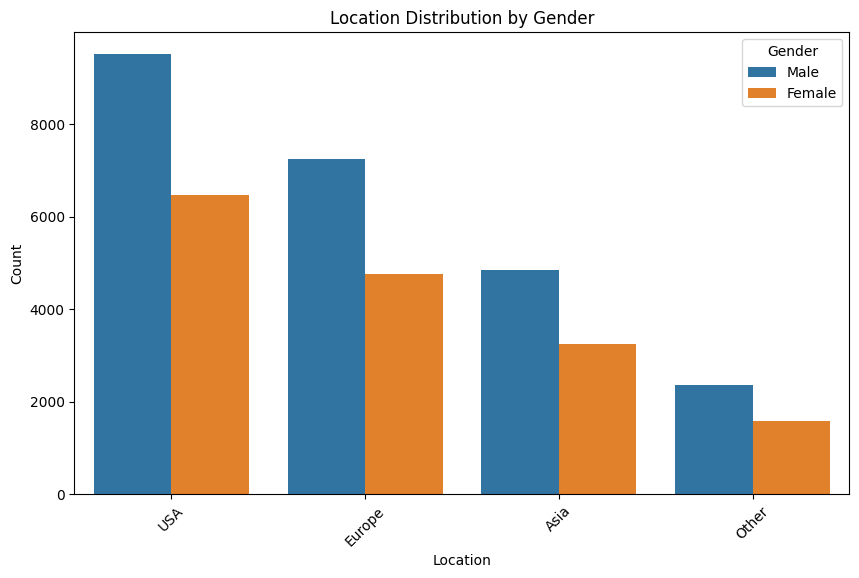

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Location', hue='Gender', data=data, order=['USA','Europe','Asia','Other'])
plt.title('Location Distribution by Gender')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

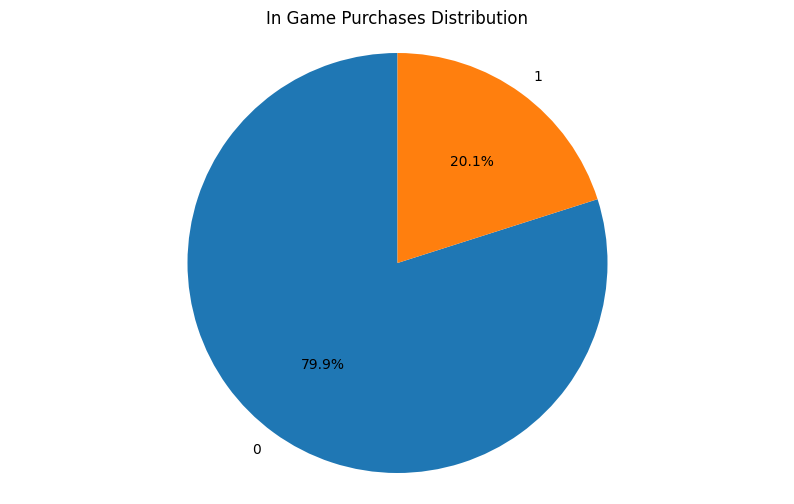

In [10]:
plt.figure(figsize=(10, 6))
InGamePurchases = data['InGamePurchases'].value_counts()
plt.pie(InGamePurchases, labels=InGamePurchases.index, autopct='%1.1f%%', startangle=90)
plt.title('In Game Purchases Distribution')
plt.axis('equal')
plt.show()

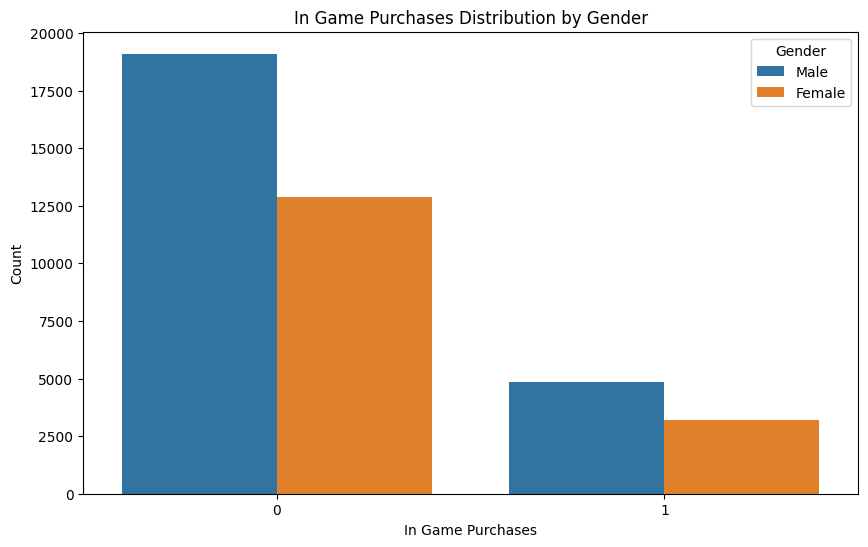

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(x='InGamePurchases', hue='Gender', data=data)
plt.title('In Game Purchases Distribution by Gender')
plt.xlabel('In Game Purchases')
plt.ylabel('Count')
plt.show()

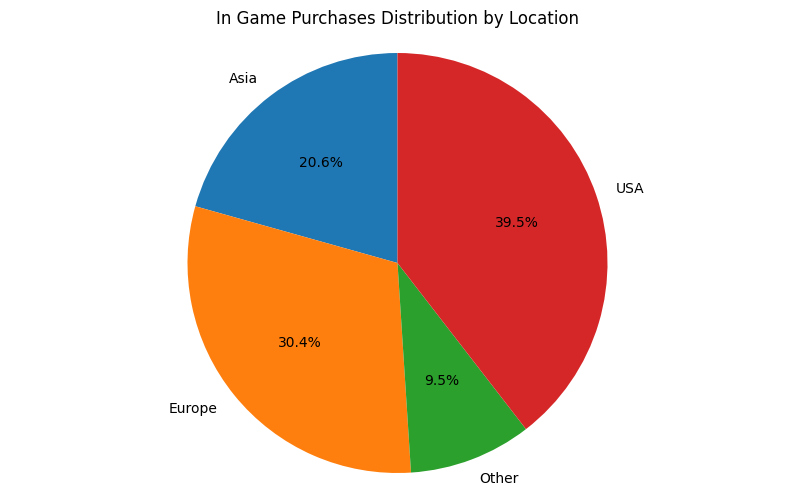

In [12]:
plt.figure(figsize=(10, 6))
purchases_by_location = data.groupby('Location')['InGamePurchases'].sum()
plt.pie(purchases_by_location, labels=purchases_by_location.index, autopct='%1.1f%%', startangle=90)
plt.title('In Game Purchases Distribution by Location')
plt.axis('equal')
plt.show()

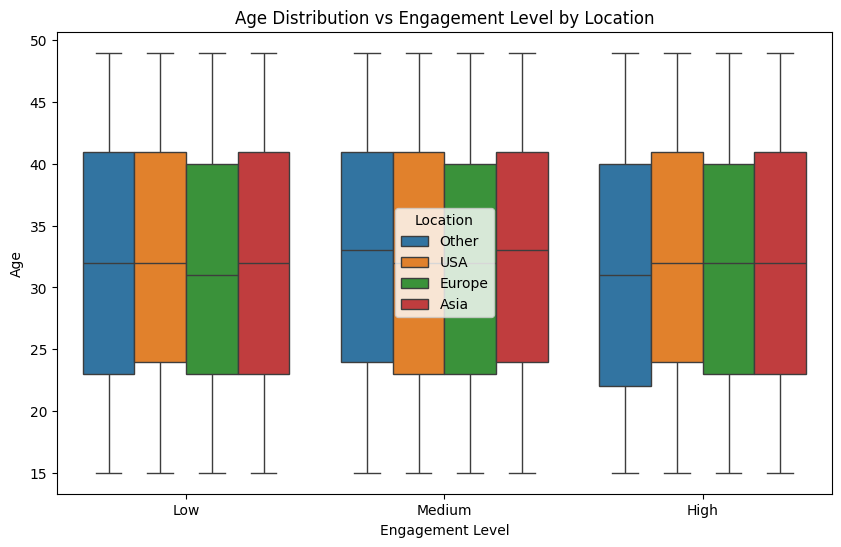

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='EngagementLevel', y='Age', hue='Location', data=data, order=['Low','Medium','High'])
plt.title('Age Distribution vs Engagement Level by Location')
plt.xlabel('Engagement Level')
plt.ylabel('Age')
plt.show()

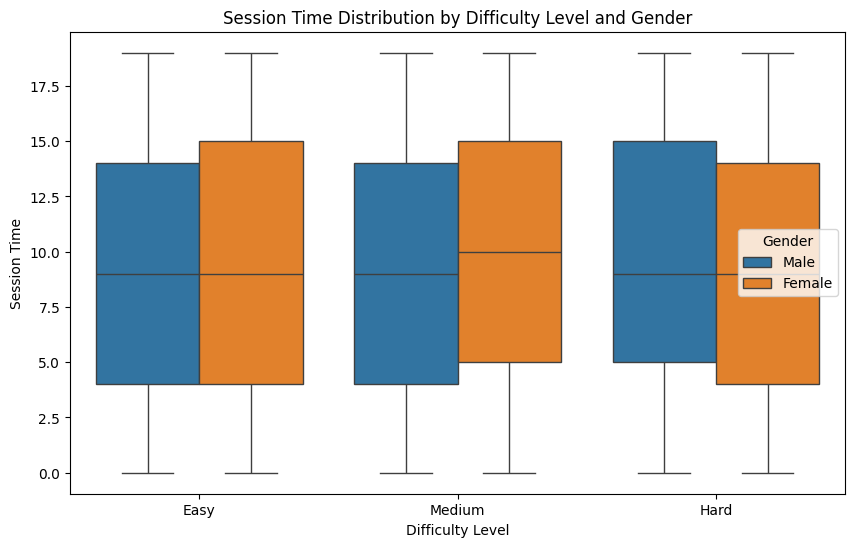

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='GameDifficulty', y='SessionsPerWeek', hue='Gender', data=data, order=['Easy', 'Medium', 'Hard'])
plt.title('Session Time Distribution by Difficulty Level and Gender')
plt.xlabel('Difficulty Level')
plt.ylabel('Session Time')
plt.show()

## Pre-Processing

In [15]:
def encode_gender(x):
  x=x.lower()
  if x=='male':
    return 1
  else:
    return 0

data['Gender']=data['Gender'].apply(encode_gender)

In [16]:
def encode_location(x):
  x=x.lower()
  if x=='usa':
    return 1
  elif x=='europe':
    return 2
  elif x=='asia':
    return 3
  else:
    return 0

data['Location']=data['Location'].apply(encode_location)

In [17]:
def encode_genre(x):
  x=x.lower()
  if x=='strategy':
    return 0
  elif x=='sports':
    return 1
  elif x=='action':
    return 2
  elif x=='adventure':
    return 3
  elif x=='rpg':
    return 4

data['GameGenre']=data['GameGenre'].apply(encode_genre)

In [18]:
def encode_engagement(x):
  x=x.lower()
  if x=='low':
    return 0
  elif x=='medium':
    return 1
  elif x=='high':
    return 2

data['EngagementLevel']=data['EngagementLevel'].apply(encode_engagement)

In [19]:
def encode_difficulty(x):
  x=x.lower()
  if x=='easy':
    return 0
  elif x=='medium':
    return 1
  elif x=='hard':
    return 2

data['GameDifficulty']=data['GameDifficulty'].apply(encode_difficulty)

In [20]:
data.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,1,0,0.0,16.271119,0,1,6,108,79,25,1
1,9001,29,0,1,0.0,5.525961,0,1,5,144,11,10,1
2,9002,22,0,1,1.0,8.223755,0,0,16,142,35,41,2
3,9003,35,1,1,2.0,5.265351,1,0,9,85,57,47,1
4,9004,33,1,2,2.0,15.531945,0,1,2,131,95,37,1


In [21]:
X_train, X_temp, Y_train, Y_temp = train_test_split(data.drop(['PlayerID','EngagementLevel'], axis=1), data['EngagementLevel'], test_size=0.4, random_state=42)
X_temp, X_test, Y_temp, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

In [22]:
X_combined = pd.concat([X_train, X_temp])
Y_combined = pd.concat([Y_train, Y_temp])

In [23]:
X_train.shape, X_temp.shape, X_test.shape

((24020, 11), (8007, 11), (8007, 11))

In [24]:
Y_train.shape, Y_temp.shape, Y_test.shape

((24020,), (8007,), (8007,))

## Classifier

lr model is trained.
lr model accuracy is 0.829024603471962


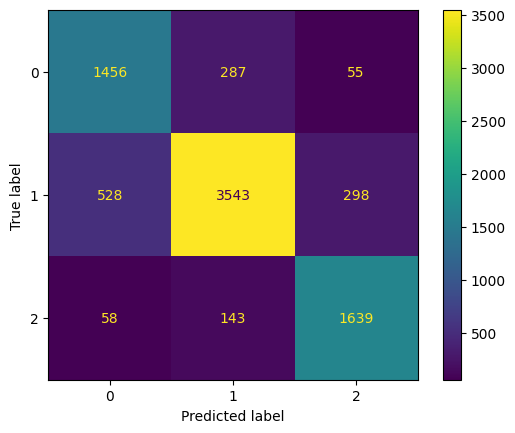

              precision    recall  f1-score   support

           0       0.71      0.81      0.76      1798
           1       0.89      0.81      0.85      4369
           2       0.82      0.89      0.86      1840

    accuracy                           0.83      8007
   macro avg       0.81      0.84      0.82      8007
weighted avg       0.84      0.83      0.83      8007

rf model is trained.
rf model accuracy is 0.9102035718746098


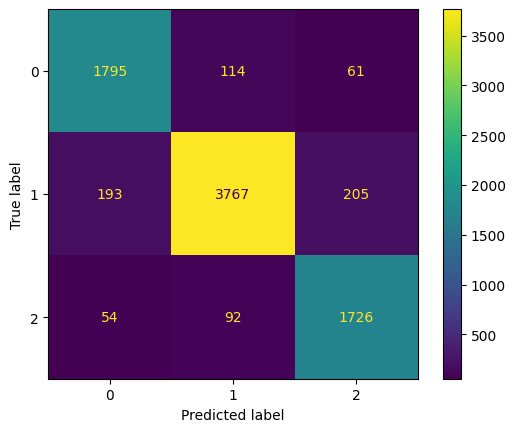

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      1970
           1       0.95      0.90      0.93      4165
           2       0.87      0.92      0.89      1872

    accuracy                           0.91      8007
   macro avg       0.90      0.91      0.90      8007
weighted avg       0.91      0.91      0.91      8007

svm model is trained.
svm model accuracy is 0.8953415761208943


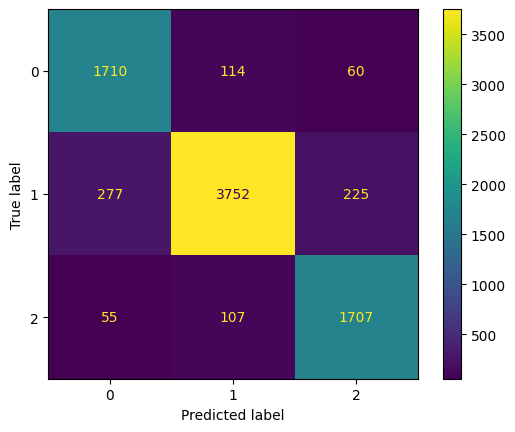

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1884
           1       0.94      0.88      0.91      4254
           2       0.86      0.91      0.88      1869

    accuracy                           0.90      8007
   macro avg       0.88      0.90      0.89      8007
weighted avg       0.90      0.90      0.90      8007



In [25]:
pipelines = {
    'lr': Pipeline([('scaler', StandardScaler()), ('imputer', SimpleImputer(strategy='median')), ('lr', LogisticRegression())]),
    'rf': Pipeline([('scaler', StandardScaler()), ('rf', RandomForestClassifier())]),
    'svm': Pipeline([('scaler', StandardScaler()), ('imputer', SimpleImputer(strategy='median')), ('svm', SVC())])
}

for algo in pipelines:
  pipelines[algo].fit(X_train, Y_train)
  print(f'{algo} model is trained.')
  y_pred = pipelines[algo].predict(X_temp)
  print(f'{algo} model accuracy is {accuracy_score(y_pred, Y_temp)}')
  cm = confusion_matrix(y_pred, Y_temp, labels=pipelines[algo].classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipelines[algo].classes_)
  disp.plot()
  plt.show()
  print(classification_report(y_pred, Y_temp))

lr model is trained.
lr model accuracy is 0.8215311602347946


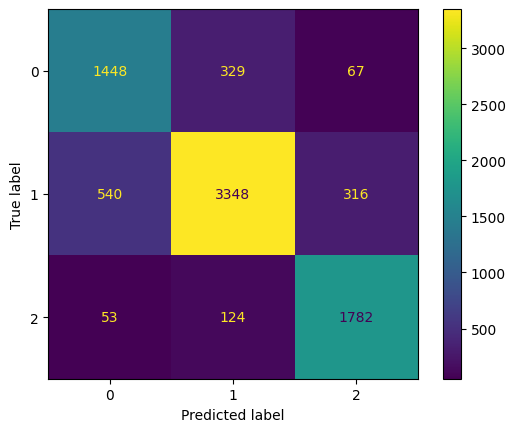

              precision    recall  f1-score   support

           0       0.71      0.79      0.75      1844
           1       0.88      0.80      0.84      4204
           2       0.82      0.91      0.86      1959

    accuracy                           0.82      8007
   macro avg       0.80      0.83      0.82      8007
weighted avg       0.83      0.82      0.82      8007

rf model is trained.
rf model accuracy is 0.9118271512426627


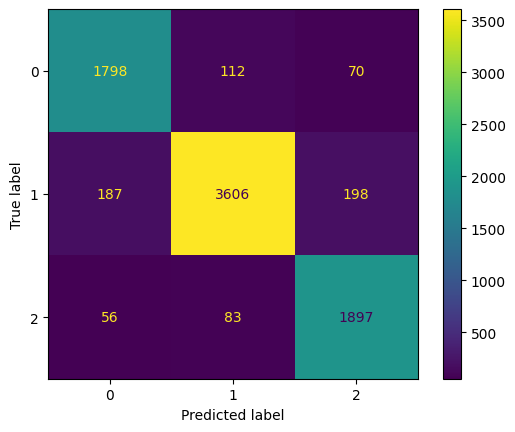

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      1980
           1       0.95      0.90      0.93      3991
           2       0.88      0.93      0.90      2036

    accuracy                           0.91      8007
   macro avg       0.90      0.91      0.91      8007
weighted avg       0.91      0.91      0.91      8007

svm model is trained.
svm model accuracy is 0.8949669039590359


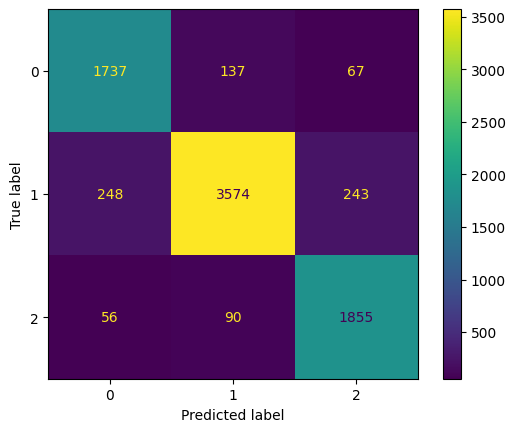

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1941
           1       0.94      0.88      0.91      4065
           2       0.86      0.93      0.89      2001

    accuracy                           0.89      8007
   macro avg       0.88      0.90      0.89      8007
weighted avg       0.90      0.89      0.90      8007



In [26]:
for algo in pipelines:
  pipelines[algo].fit(X_combined, Y_combined)
  print(f'{algo} model is trained.')
  y_pred = pipelines[algo].predict(X_test)
  print(f'{algo} model accuracy is {accuracy_score(y_pred, Y_test)}')
  cm = confusion_matrix(y_pred, Y_test, labels=pipelines[algo].classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipelines[algo].classes_)
  disp.plot()
  plt.show()
  print(classification_report(y_pred, Y_test))

# LOGISTIC_REGRESSION(X, y, learning_rate, max_iter):

1. Initialize weights: w ← random vector of size d, where d is the number of features
2. FOR i = 1 TO max_iter DO
3. Calculate predictions: z ← Xw
4. Apply sigmoid function: y_hat ← sigmoid(z)
5. Calculate gradient: gradient ← (y_hat - y) * X
6. Update weights: w ← w - learning_rate * gradient
7. END FOR
8. RETURN w

## PREDICT(X, w):
1. Calculate predictions: z ← Xw
2. Apply sigmoid function: y_hat ← sigmoid(z)
3. RETURN y_hat

# RANDOM_FOREST(D, n_estimators, max_depth, max_features):

1. FOR i = 1 TO n_estimators DO

2. Bootstrap_sample ← SAMPLE_WITH_REPLACEMENT(D)

3. tree ← BUILD_DECISION_TREE(Bootstrap_sample, max_depth, max_features)

4. forest.append(tree)

5. END FOR

6. RETURN forest

## BUILD_DECISION_TREE(D, max_depth, max_features):

1. IF (max_depth = 0) OR (all labels in D are the same) THEN

2. RETURN LEAF_NODE(D)

3. END IF

4. Select_features ← RANDOM_SUBSET(features(D), max_features)

5. best_feature ← BEST_FEATURE_SPLIT(D, Select_features)

6. threshold ← BEST_THRESHOLD(D, best_feature)

7. D_left ← Subset of D where best_feature < threshold

8. D_right ← Subset of D where best_feature >= threshold

9. node ← NODE(best_feature, threshold)

10. node.left ← BUILD_DECISION_TREE(D_left, max_depth - 1, max_features)

11. node.right ← BUILD_DECISION_TREE(D_right, max_depth - 1, max_features)

12. RETURN node

## PREDICT(forest, x):

1. predictions ← []

2. FOR tree IN forest DO

3. prediction ← PREDICT_TREE(tree, x)

4. predictions.append(prediction)

5. END FOR

6. IF (classification) THEN

7. RETURN most frequent prediction in predictions

8. ELSE

9. RETURN average of predictions

10. END IF

# SVC(X, y, C, kernel):

1. Initialize alpha: alpha ← vector of zeros of size n, where n is the number of samples.
2. Construct kernel matrix: K ← kernel(X, X) (e.g., linear, polynomial, RBF)
3. Create constraint matrix: A ← y.reshape(1, -1)
4. Create constraint vector: b ← np.ones(1)
5. Solve quadratic programming problem: alpha ← solve_qp(K, -np.ones(n), A, b, C)
6. Find support vectors: support_vectors ← indices where alpha > 0
7. Calculate bias: b ← np.mean(y[support_vectors] - np.dot(K[support_vectors, support_vectors], alpha[support_vectors]))
8. RETURN alpha, support_vectors, b

## PREDICT(X_test, alpha, support_vectors, b, K_test):

1. Calculate kernel matrix for test data: K_test ← kernel(X_test, X[support_vectors])
2. Calculate predictions: y_pred ← np.sign(np.dot(K_test, alpha[support_vectors]) + b)
3. RETURN y_pred

# Project Overview:

This project aims to develop a classification model capable of accurately predicting gaming behaviour. The dataset, sourced from Kaggle, contains information on various online gaming related attributes, including:



*   PlayerID: Unique identifier for each player.
*   Age: Age of the player.
*   Gender: Gender of the player.
*   Location: Geographic location of the player.
*   GameGenre: Genre of the game the player is engaged in.
*   PlayTimeHours: Average hours spent playing per session.
*   InGamePurchases: Indicates whether the player makes in-game purchases (0 = No, 1 = Yes).
*   GameDifficulty: Difficulty level of the game.
*   SessionsPerWeek: Number of gaming sessions per week.
*   AvgSessionDurationMinutes: Average duration of each gaming session in minutes.
*   PlayerLevel: Current level of the player in the game.
*   AchievementsUnlocked: Number of achievements unlocked by the player.
*   EngagementLevel: Categorized engagement level reflecting player retention ('High', 'Medium', 'Low').

To understand the data and identify potential relationships between variables, we conducted exploratory data analysis (EDA). This involved visualizing the data through various plots, such as bar graph, scatter plot and line graph.

After exploring the data, we experimented with different classification models, including logistic regression, random forest classifier and support vector classifier. These models were evaluated using metrics such as Accuracy Score, Confusion Matrix and Classification Report. Based on the evaluation results, we selected the random forest classifier as the most effective model for classifying engagement level of an individual.

Dataset Source:
https://www.kaggle.com/datasets/rabieelkharoua/predict-online-gaming-behavior-dataset

---

## Practical Application:
A few real world cases where this model can be deployed are:


*   Online Gaming Industry: To optimize gaming experience so that they gain maximum engagement from an individual.
*   Esport Organizers: To check on which game type are most played in order to conduct an esport tournament.

---

## Conclusion:

Our project successfully developed a Random Forest Classifier model capable of accurately classify engagement level. The model achieved an accuracy score of 91.35%, indicating that it can fairly explain a significant portion of the variance in engagement levels. This performance surpasses the results obtained from the other tested models, logistic regression and SVC.






















